3.16**2 * ExpSineSquared(length_scale=0.8, periodicity=10)


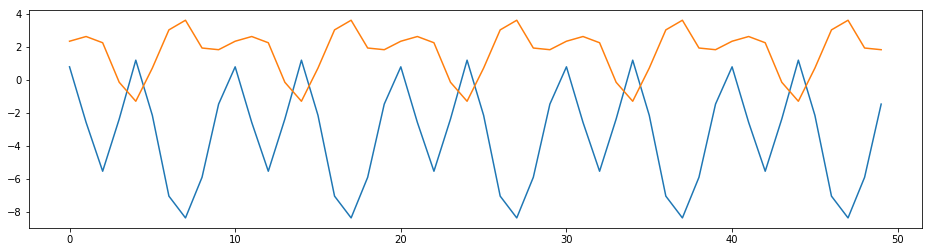

In [108]:
################################################################################################
# Modelling Sleep Duration Using Gaussian Processes
# LE49: MiniProject
# Jan Ondras (jo356), Trinity College
# 2017/2018
################################################################################################
# Sample kernels to see how kernel parameters affect the behaviour of functions obtained
################################################################################################

import numpy as np
import time
import glob
import matplotlib.pyplot as plt
import sklearn.gaussian_process as gp   # Gaussian process modeling
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel, ConstantKernel, RBF, Matern


# Sample various kernel types

yeardays = np.arange(50)

kernel = ( ConstantKernel(constant_value=10, constant_value_bounds=(0.001, 10.)) 
         #* Matern(length_scale=1000, length_scale_bounds=(1., 1000.0), nu=2.5) 
        * ExpSineSquared(length_scale=0.8, periodicity=10.0, 
                         length_scale_bounds=(1.,1.), periodicity_bounds=(1., 365.)) #length_scale_bounds=(0.5, 365.0)
#           + WhiteKernel(noise_level=0.001, noise_level_bounds=(0.01, 10.0)) 
         )

model = gp.GaussianProcessRegressor(kernel=kernel)

# Number of sample functions
N = 2

ys = model.sample_y(yeardays[..., np.newaxis], n_samples=N)
print model.kernel
plt.figure(figsize=(16,4))
plt.plot(yeardays, ys)
plt.show()
